In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import numpy as np

import itk
print(itk.__version__)

5.4.0


/home/uberblitzsche/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Paths
Data = '../Data/'
scan1_name = 'case6_gre1'
scan2_name = 'case6_gre2'

In [3]:
def getFrom(path):
    scan = itk.imread(path)
    caster = itk.CastImageFilter[scan, itk.Image[itk.F, 3]].New()
    caster.SetInput(scan)
    caster.Update()
    scan = caster.GetOutput()
    
    img = itk.GetArrayFromImage(scan)
    min_val = img.min()
    max_val = img.max()
    
    img = 255 * (img - min_val) / (max_val - min_val)
    
    scan = itk.GetImageFromArray(img)
    
    return scan

scan1 = getFrom(Data + scan1_name + ".nrrd")
scan2 = getFrom(Data + scan2_name + ".nrrd")
scan1.shape

(176, 256, 256)

In [22]:
true_point_1 = [49, 82, 69]
true_point_2 = [79, 124, 63]
true_point_3 = [82, 98, 77]

true_points = [true_point_1, true_point_2, true_point_3]

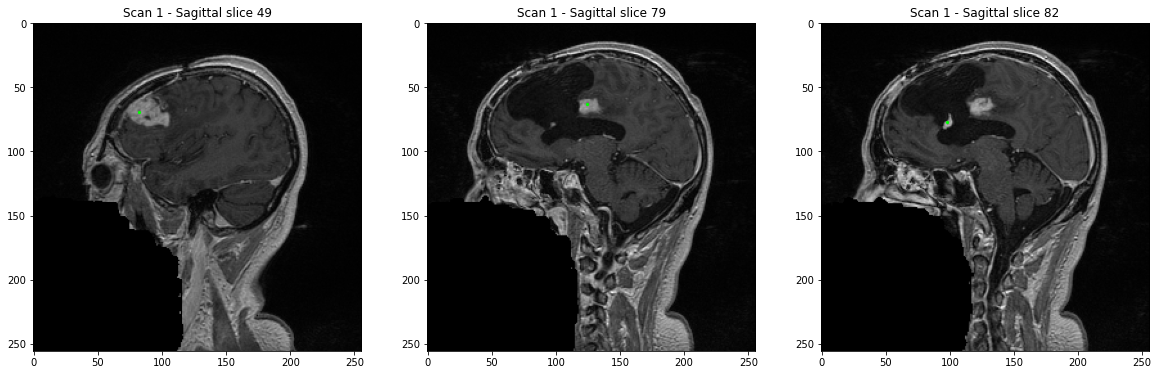

In [25]:
plt.figure(figsize=(20, 10))

for i in range(3):
    point = true_points[i]
    plt.subplot(1, 3, i + 1)

    plt.title("Scan 1 - Sagittal slice " + str(point[0]))
    plt.scatter(point[1], point[2], color='lime', s=5)
    plt.imshow(scan1[point[0], :, :], cmap='gray')
    
plt.show()

In [6]:
def segmentation(scan, seedZ, seedX, seedY, lower):
    smoother = itk.GradientAnisotropicDiffusionImageFilter.New(Input=scan, NumberOfIterations=20, TimeStep=0.04, ConductanceParameter=3)
    smoother.Update()
    
    connected_threshold = itk.ConnectedThresholdImageFilter.New(smoother.GetOutput())
    
    connected_threshold.SetReplaceValue(255)
    connected_threshold.SetLower(lower)
    connected_threshold.SetUpper(255)
    connected_threshold.SetSeed((seedX, seedY, seedZ))
    connected_threshold.Update()
    segmented_image = connected_threshold.GetOutput()

    return segmented_image

# Segmentation scan 1

## Tumor 1

In [7]:
tumor_1_1 = segmentation(scan1, 49, 82, 69, 70)

def plot_slices(slice_index):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Scan 1 - Tumor 1")
    plt.imshow(tumor_1_1[slice_index, :, :], cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Scan 1 - Sagittal")
    plt.imshow(scan1[slice_index, :, :], cmap='gray')
    
    plt.show()

# Define the slider
slice_slider = IntSlider(min=35, max=65, step=1, value=49)

# Use the interact function to update the plot with the slider
interact(plot_slices, slice_index=slice_slider)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_slices(slice_index)>

## Tumor 2

In [8]:
tumor_1_2 = segmentation(scan1, 79, 124, 63, 70)

def plot_slices(slice_index):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Scan 1 - Tumor 2")
    plt.imshow(tumor_1_2[slice_index, :, :], cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Scan 1 - Sagittal")
    plt.imshow(scan1[slice_index, :, :], cmap='gray')
    
    plt.show()

# Define the slider
slice_slider = IntSlider(min=70, max=95, step=1, value=49)

# Use the interact function to update the plot with the slider
interact(plot_slices, slice_index=slice_slider)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_slices(slice_index)>

## Tumor 3

In [9]:
tumor_1_3 = segmentation(scan1, 82, 98, 77, 70)

def plot_slices(slice_index):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Scan 1 - Tumor 1")
    plt.imshow(tumor_1_3[slice_index, :, :], cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Scan 1 - Sagittal")
    plt.imshow(scan1[slice_index, :, :], cmap='gray')
    
    plt.show()

# Define the slider
slice_slider = IntSlider(min=75, max=90, step=1, value=49)

# Use the interact function to update the plot with the slider
interact(plot_slices, slice_index=slice_slider)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_slices(slice_index)>

## Fusion

In [10]:
tumors = np.maximum(np.maximum(tumor_1_1, tumor_1_2), tumor_1_3)

def plot_slices(slice_index):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Scan 1 - Tumors")
    plt.imshow(tumors[slice_index, :, :], cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Scan 1 - Sagittal")
    plt.imshow(scan1[slice_index, :, :], cmap='gray')
    
    plt.show()

# Define the slider
slice_slider = IntSlider(min=0, max=scan1.shape[0]-1, step=1, value=49)

# Use the interact function to update the plot with the slider
interact(plot_slices, slice_index=slice_slider)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_slices(slice_index)>

In [11]:
color_head = np.empty((scan1.shape[0], scan1.shape[1], scan1.shape[2], 3))

color_head[:, :, :, 0] = scan1[:, :, :] / 255
color_head[:, :, :, 1] = scan1[:, :, :] / 255
color_head[:, :, :, 2] = scan1[:, :, :] / 255

color_head[:, :, :, 0][tumors == 255] = 1

def plot_slices(slice_index):
    plt.figure(figsize=(10, 5))
    
    plt.title("Scan 1 - Sagittal")
    plt.imshow(color_head[slice_index, :, :, :])
    
    plt.show()

# Define the slider
slice_slider = IntSlider(min=0, max=scan1.shape[0]-1, step=1, value=49)

# Use the interact function to update the plot with the slider
interact(plot_slices, slice_index=slice_slider)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_slices(slice_index)>